# MOwNiT 
## Laboratorium
### Znajdowanie pierwiastków

Do poszukiwania pierwiastków funkcji w Julii używamy pakietu Roots

```julia
Pkg.add("Roots")
Pkg.add("ForwardDiff")
```

In [1]:
using Pkg
# Pkg.add("Roots")
# Pkg.add("ForwardDiff")
using Roots  
using Plots
using ForwardDiff

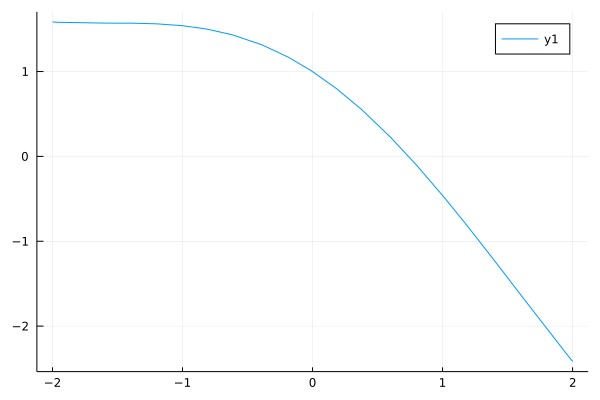

In [2]:
# przykładowa funkcja do testów
f(x) = cos(x) - x
plot(f, -2, 2)

Funkcja <i> find_zero</i>  dobiera odpowiedni algorytm w zależności od sposobu wywołania.


### 1. Metody wykorzytujące  przedział i zmianę znaku

#### 1.1 Metoda bisekcji - jesli wywołamy fzero z podaniem  przedziału (tutaj (0,1))

In [3]:
x = find_zero(f, (0, 1),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151609
* Algorithm: Roots.BisectionExact()
* iterations: 60
* function evaluations: 62
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  1.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  1.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  1.0000000000000000)
(a_5, b_5) = ( 0.0000000002401066,  1.0000000000000000)
(a_6, b_6) = ( 0.0000154972076416,  1.0000000000000000)
(a_7, b_7) = ( 0.0039367675781250,  1.0000000000000000)
(a_8, b_8) = ( 0.0627441406250000,  1.0000000000000000)
(a_9, b_9) = ( 0.2504882812500000,  1.0000000000000000)
(a_10, b_10) = ( 0.5004882812500000,  1.0000000000000000)
(a_11, b_11) = ( 0.5004882812500000,  0.7502441406250000)
(a_12, b_12) = ( 0.6253662109375000,  

0.7390851332151607

In [4]:
# mozna wyspecyfikowac wprost
x = find_zero(f, (0, 1), Bisection(),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151609
* Algorithm: Roots.BisectionExact()
* iterations: 60
* function evaluations: 62
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  1.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  1.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  1.0000000000000000)
(a_5, b_5) = ( 0.0000000002401066,  1.0000000000000000)
(a_6, b_6) = ( 0.0000154972076416,  1.0000000000000000)
(a_7, b_7) = ( 0.0039367675781250,  1.0000000000000000)
(a_8, b_8) = ( 0.0627441406250000,  1.0000000000000000)
(a_9, b_9) = ( 0.2504882812500000,  1.0000000000000000)
(a_10, b_10) = ( 0.5004882812500000,  1.0000000000000000)
(a_11, b_11) = ( 0.5004882812500000,  0.7502441406250000)
(a_12, b_12) = ( 0.6253662109375000,  

0.7390851332151607

#### Sprawdzanie, czy znaleźliśmy 0

In [5]:
#Sprawdzamy czy znaleźliśmy 0
iszero(f(x))

true

In [6]:
# można też sprawdzić, czy funkcja zmienia znak dla lewego i prawego sąsiada miejsca zerowego.
sign(f(prevfloat(x))) *sign(f(nextfloat(x))) 

-1.0

In [7]:
# czasem algorytm znajduje najlepsze przybliżenie 0
g(x) = sin(x)
x = find_zero(g, (pi/2, 3pi/2))
x, g(x)

(3.1415926535897936, -3.216245299353273e-16)

In [8]:
# nie jest to dokładnie 0, ale ...
iszero(g(x))

false

In [9]:
#... najbliższy lewy albo prawy sąsiad leży po przeciwnej stronie osi x  niż nasze 0.
g(prevfloat(x)) * g(x) < 0.0 || g(x) * g(nextfloat(x)) < 0.0

true

#### 1.2 Metoda regula falsi

In [10]:
find_zero(f, (0, 1), FalsePosition(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 6
* function evaluations: 8
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 1.0000000000000000,  0.6850733573260451)
(a_2, b_2) = ( 1.0000000000000000,  0.7362989976136540)
(a_3, b_3) = ( 0.7362989976136540,  0.7390895164441823)
(a_4, b_4) = ( 0.7390895164441823,  0.7390851305146882)
(a_5, b_5) = ( 0.7390895164441823,  0.7390851332151580)
(a_6, b_6) = ( 0.7390895164441823,  0.7390851332151607)



0.7390851332151607

In [11]:
# do dyspozycji mamy  12 wersji algorytmu regula falsi
find_zero(f, (0, 1), FalsePosition(12), verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{12}()
* iterations: 6
* function evaluations: 8
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 1.0000000000000000,  0.6850733573260451)
(a_2, b_2) = ( 1.0000000000000000,  0.7362989976136540)
(a_3, b_3) = ( 0.7362989976136540,  0.7390895164441823)
(a_4, b_4) = ( 0.7390895164441823,  0.7390851305146882)
(a_5, b_5) = ( 0.7390895164441823,  0.7390851332151580)
(a_6, b_6) = ( 0.7390895164441823,  0.7390851332151607)



0.7390851332151607

### 2. Metody korzytające z pochodnych

#### 2.1 Metoda Newtona, potrzebuje punktu startowego i wykorzystuje pochodną funkcji.

Aby użyć Metody Newtona, można skorzystać z pakietu ForwardDiff, aby obliczyć pochodną funkcji. 

In [12]:
# definujemy D(f) obliczającą  funkcje pochodną 
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

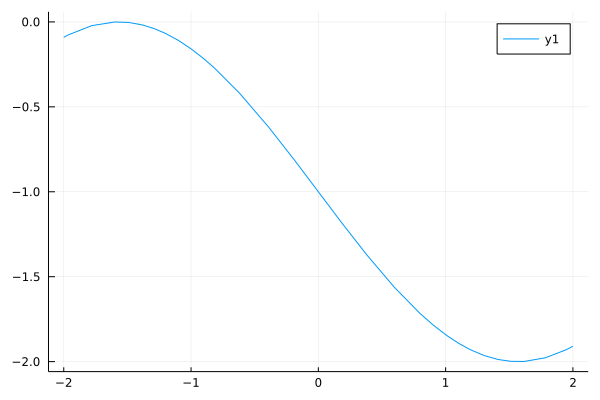

In [13]:
plot(D(f), -2,2)

In [14]:
#wywolanie metody Newtona
find_zero((f, D(f)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations: 11
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  1.0000000000000000,	 fx_1 = -0.4596976941318602
x_2 =  0.7503638678402439,	 fx_2 = -0.0189230738221174
x_3 =  0.7391128909113617,	 fx_3 = -0.0000464558989908
x_4 =  0.7390851333852840,	 fx_4 = -0.0000000002847206
x_5 =  0.7390851332151607,	 fx_5 =  0.0000000000000000



0.7390851332151607

#### 2.2 Metoda Halleya (potrzebuje pierwszej i drugiej pochodnej)

In [15]:
DD(f) = x->ForwardDiff.derivative(D(f), float(x))
find_zero((f, D(f), DD(f)), 0.0, Roots.Halley(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151606
* Algorithm: Roots.Halley()
* iterations: 4
* function evaluations: 15
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.6666666666666666,	 fx_1 =  0.1192205941102814
x_2 =  0.7390392624463102,	 fx_2 =  0.0000767690929604
x_3 =  0.7390851332151495,	 fx_3 =  0.0000000000000187
x_4 =  0.7390851332151606,	 fx_4 =  0.0000000000000001



0.7390851332151606

### 3. Metody korzystające z przybliżenia pochodnej

#### 3.1 Domyślna metoda bazuje na metodzie z <a href="http://www.hpl.hp.com/hpjournal/pdfs/IssuePDFs/1979-12.pdf"> kalkulatorów HP-34</a> , używa metody siecznych
oraz metody bazującej na przedziale wg artykułu:

<a href="http://na.math.kit.edu/alefeld/download/1995_Algorithm_748_Enclosing_Zeros_of_Continuous_Functions.pdf">G. E. Alefeld, F. A. Potra, and
Y. Shi, "Algorithm 748: enclosing zeros of continuous functions," ACM
Trans. Math. Softw. 21, 327–344 (1995), DOI: 10.1145/210089.210111. </a>

In [16]:
x = find_zero(f, 0,   verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851344824166
* Algorithm: Roots.Secant(), with possible bracketing with Roots.AlefeldPotraShi()
* iterations: 2
* function evaluations: 11
* Note: Exact zero found. Bracketing used over (0.0, 0.9999969722835389), those steps not shown. 

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000



0.7390851332151607

Metody find_zero dla wyzszych rzędów to wariacje metody Newtona, które nie korzystaja z pochodnej, ale ja przyblizają.


#### 3.2 Metoda siecznych

In [17]:
# wywołanie find_zero używając punktu startowego (a nie przedziału) 
# oraz opcji order=1   wykorzystuje metodę siecznych  
x = find_zero(f, 0, Order1(),  verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Secant()
* iterations: 7
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.9999969722835389,	 fx_1 = -0.4596921186823234
x_2 =  0.6850738998209052,	 fx_2 =  0.0892983907342113
x_3 =  0.7362990541607766,	 fx_3 =  0.0046599445167859
x_4 =  0.7391193608624661,	 fx_4 = -0.0000572842351875
x_5 =  0.7390851121285389,	 fx_5 =  0.0000000352908237
x_6 =  0.7390851332150014,	 fx_6 =  0.0000000000002666
x_7 =  0.7390851332151607,	 fx_7 =  0.0000000000000000



0.7390851332151607

In [18]:
# metoda siecznych może być wywołana bezpośrednio 
# implementacja taka sama jak find_zero(f, 0, Order1()), ale bez
# narzutów frameworku oraz mniejsza ilość sprawdzanych warunków zbieżności - szybsza
Roots.secant_method(f, 0)

0.7390851332151607

In [19]:
# mozemy podać przedział
Roots.secant_method(f, (0,1))

0.7390851332151607

#### 3.3 Metoda Steffensena 
przybliża pochodną poprzez  (f(x + f(x)) - f(x))/f(x)  
aby ja wywołać podajemy punkt startowy oraz order 2

In [20]:
x = find_zero(f, 0, Order2(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order2()
* iterations: 6
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.9999969722835389,	 fx_1 = -0.4596921186823234
x_2 =  0.6850738998209052,	 fx_2 =  0.0892983907342113
x_3 =  0.7362990541607766,	 fx_3 =  0.0046599445167859
x_4 =  0.7391193608624661,	 fx_4 = -0.0000572842351875
x_5 =  0.7390851330409081,	 fx_5 =  0.0000000002916313
x_6 =  0.7390851332151607,	 fx_6 =  0.0000000000000000



0.7390851332151607

In [21]:
# mozliwe sa jeszcze rzędy 5, 8 i 16
x = find_zero(f, 0, Order8(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order8()
* iterations: 2
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.7369285852997423,	 fx_1 =  0.0036075047762146
x_2 =  0.7390851332151607,	 fx_2 =  0.0000000000000000



0.7390851332151607

Można użyć funkcji fzero do znajdowania nieciagłości

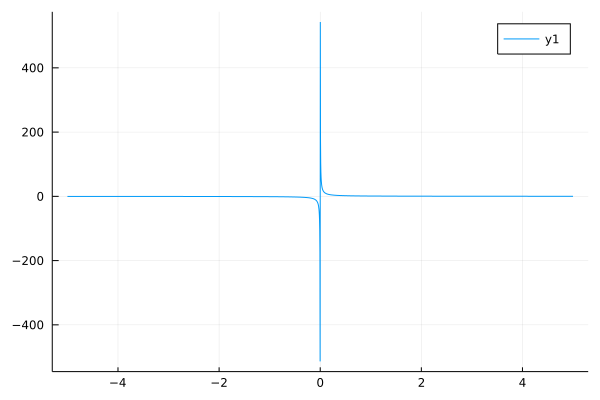

In [22]:
plot(x -> 1/x)

In [23]:
find_zero(x -> 1/x, (-1, 1), verbose=true)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.BisectionExact()
* iterations: 61
* function evaluations: 63
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Change of sign at xn identified. 

Trace:
(a_0, b_0) = (-1.0000000000000000,  0.0000000000000000)
(a_1, b_1) = (-0.0000000000000000,  0.0000000000000000)
(a_2, b_2) = (-0.0000000000000000,  0.0000000000000000)
(a_3, b_3) = (-0.0000000000000000,  0.0000000000000000)
(a_4, b_4) = (-0.0000000000000000,  0.0000000000000000)
(a_5, b_5) = (-0.0000000000000000,  0.0000000000000000)
(a_6, b_6) = (-0.0000000000000000,  0.0000000000000000)
(a_7, b_7) = (-0.0000000000000000,  0.0000000000000000)
(a_8, b_8) = (-0.0000000000000000,  0.0000000000000000)
(a_9, b_9) = (-0.0000000000000000,  0.0000000000000000)
(a_10, b_10) = (-0.0000000000000000,  0.0000000000000000)
(a_11, b_11) = (-0.0000000000000000,  0.0000000000000000)
(a_12, b_12) = (-0.0000000000000000,  0.0000000000000000)
(a_13, b_13) = (-0.0000

0.0

find_zeros - szukanie więcej niż jednego pierwiastka. Wykorzystuje podział przedziału na mniejsze podprzedziały

In [24]:
find_zeros(x ->(x-3)*x, -10, 10)

2-element Vector{Float64}:
 0.0
 3.0

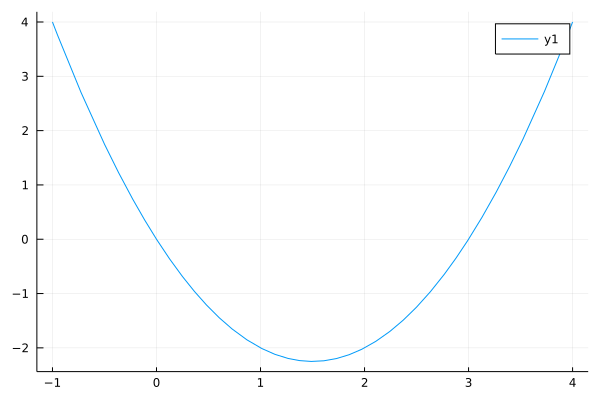

In [25]:
plot(x ->(x-3)*x,-1,4)

Więcej na https://github.com/JuliaMath/Roots.jl/blob/master/doc/roots.ipynb

### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

    1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

    2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

    3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

B. Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

# Zadanie A

### 1.

In [26]:
using DataFrames

In [27]:
df_test = DataFrame(
    fun = String[],
    method = String[], 
    iterations = Int64[],
    counting_function = Int64[],
    root_x = Float64[],
    root_y = Float64[],
    correct_iszero = Bool[],
    signdiff = Float64[]
)

,fun,method,iterations,counting_function,root_x,root_y,correct_iszero
,String,String,Int64,Int64,Float64,Float64,Bool


In [28]:
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

In [29]:
algorithms = [ "Roots.BisectionExact()"
    "Roots.Newton()"
    "Roots.Secant()"
];

In [30]:
f1(x) = sin(x) - x / 2 #1

f2(x) = 2 * x - exp( - x ) #2

f3(x) =  20.0 * x / ( 100.0 * x * x + 1.0 ) # 10. The repeller

function f4(x) #15.
    if ( x < 0.0 )
    - abs( x ) ^ ( 1.0 / 3.0 ) * exp( - x ^ 2 )
    elseif ( x == 0.0 )
    0.0
    else
    abs( x ) ^ ( 1.0 / 3.0 ) * exp( - x ^ 2 )
    end
end

f5(x) = cos( x ) - x #8.

function f6(x) #9. the Newton Baffler
    if ( x < 6.0 )
    0.75 * ( x - 6.25 ) - 0.3125
    elseif ( x <= 6.50 )
    2.00 * ( x - 6.25 )
    else
    0.75 * ( x - 6.25 ) + 0.3125
    end
end
;

In [31]:
test_functions = [
    [f1, -4,   4],
    [f2, -0.5, 3],
    [f3, -2,   2],
    [f4, -4,   4],
    [f5, -4,   4],
    [f6,  5,   7],
];

## Function 1

In [32]:
index = 1

1

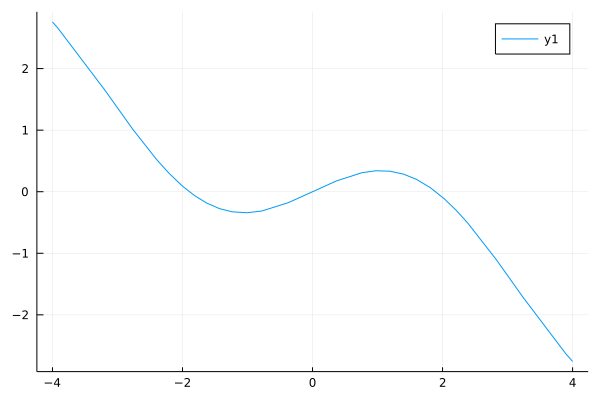

In [33]:
plot(test_functions[index][1],
    test_functions[index][2],
    test_functions[index][3]
)

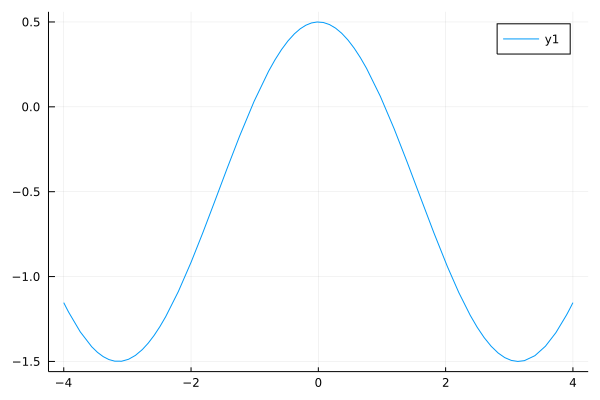

In [34]:
plot(D(test_functions[index][1]),
    test_functions[index][2],
    test_functions[index][3]
)

In [35]:
detected_roots = [
    find_zero(
        test_functions[index][1],
        (test_functions[index][2], test_functions[index][3]), 
        Bisection(),
        verbose=true),
    
    
    
    find_zero(
        (test_functions[index][1], D(test_functions[index][1])), 
        test_functions[index][2], 
        Roots.Newton(),
        verbose=true),
    
    
    
    find_zero(
        test_functions[index][1], 
        test_functions[index][2],   
        verbose=true) 
    ];

println("Checking correctness\n")

for i in 1:length(detected_roots)
    if detected_roots[i] != NaN
        root = detected_roots[i]
        println(algorithms[i])
        println("root is: ",root)
        println("f(x): ",test_functions[index][1](root))
        println("iszero: ",iszero(test_functions[index][1](root)))
        println("sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): ",
            sign(test_functions[index][1](prevfloat(root))) * 
            sign(test_functions[index][1](nextfloat(root))) )

        println("-------------------")
    end
end

Results of univariate zero finding:

* Converged to: 4.0
* Algorithm: Roots.BisectionExact()
* iterations: 0
* function evaluations: 3
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Exact zero found

Trace:
(a_0, b_0) = (-4.0000000000000000,  4.0000000000000000)

Results of univariate zero finding:

* Converged to: -1.895494267033981
* Algorithm: Roots.Newton()
* iterations: 6
* function evaluations: 13
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -4.0000000000000000,	 fx_0 =  2.7568024953079284
x_1 = -1.6103517191520549,	 fx_1 = -0.1940419278890597
x_2 = -1.9699916004393636,	 fx_2 =  0.0636217292796347
x_3 = -1.8984000905205811,	 fx_3 =  0.0023839348777178
x_4 = -1.8954991329401036,	 fx_4 =  0.0000039852979348
x_5 = -1.8954942670476800,	 fx_5 =  0.0000000000112198
x_6 = -1.8954942670339809,	 fx_6 =  0.0000000000000000

Results of univariate zero finding:

* Converged to: -1.8954942670339807
* Algorithm: Roots.Secant(), with possi

In [36]:
push!(df_test,
    ["f1", "bisection", 
        0, 3,
        0.0,
        0.0,
        true, -1.0
    ]
);

In [37]:
push!(df_test,
    ["f1", "newton", 
        6, 13,
        -1.895494267033981,
        0.0,
        true, -1.0
    ]
);

In [38]:
push!(df_test,
    ["f1", "secant", 
        2, 11,
        -1.8954942670339807,
        -2.220446049250313e-16,
        false, -0.0
    ]
);

## Function 2

In [39]:
index = 2

2

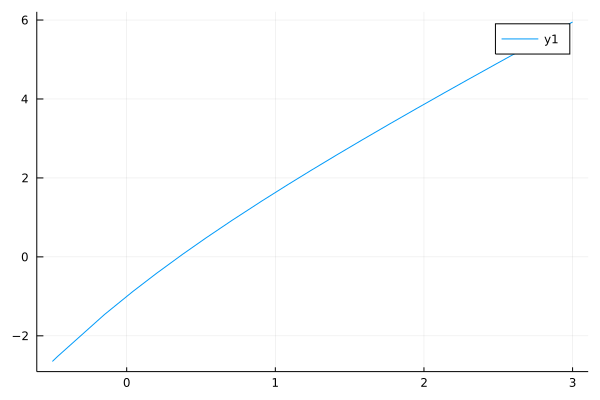

In [40]:
plot(test_functions[index][1],
    test_functions[index][2],
    test_functions[index][3]
)

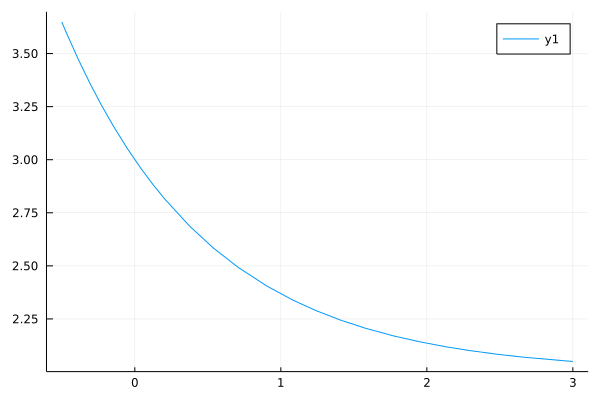

In [41]:
plot(D(test_functions[index][1]),
    test_functions[index][2],
    test_functions[index][3]
)

In [42]:
detected_roots = [
    find_zero(
        test_functions[index][1],
        (test_functions[index][2], test_functions[index][3]), 
        Bisection(),
        verbose=true),
    
    
    
    find_zero(
        (test_functions[index][1], D(test_functions[index][1])), 
        test_functions[index][2], 
        Roots.Newton(),
        verbose=true),
    
    
    
    find_zero(
        test_functions[index][1], 
        test_functions[index][2],   
        verbose=true) 
    ];

println("Checking correctness\n")

for i in 1:length(detected_roots)
    if detected_roots[i] != NaN
        root = detected_roots[i]
        println(algorithms[i])
        println("root is: ",root)
        println("f(x): ",test_functions[index][1](root))
        println("iszero: ",iszero(test_functions[index][1](root)))
        println("sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): ",
            sign(test_functions[index][1](prevfloat(root))) * 
            sign(test_functions[index][1](nextfloat(root))) )

        println("-------------------")
    end
end

Results of univariate zero finding:

* Converged to: 0.35173371124919595
* Algorithm: Roots.BisectionExact()
* iterations: 60
* function evaluations: 62
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  3.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  3.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  3.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  3.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  3.0000000000000000)
(a_5, b_5) = ( 0.0000000006912160,  3.0000000000000000)
(a_6, b_6) = ( 0.0000455379486084,  3.0000000000000000)
(a_7, b_7) = ( 0.0116882324218750,  3.0000000000000000)
(a_8, b_8) = ( 0.1872558593750000,  3.0000000000000000)
(a_9, b_9) = ( 0.1872558593750000,  0.7495117187500000)
(a_10, b_10) = ( 0.1872558593750000,  0.3746337890625000)
(a_11, b_11) = ( 0.2497863769531250,  0.3746337890625000)
(a_12, b_12) = ( 0.3121032714843750, 

In [43]:
push!(df_test,
    ["f2", "bisection", 
        60, 62,
        0.35173371124919584,
        0.0,
        true, -1.0
    ]
);

In [44]:
push!(df_test,
    ["f2", "newton", 
        5, 11,
        0.35173371124919584,
        0.0,
        true, -1.0
    ]
);

In [45]:
push!(df_test,
    ["f2", "secant", 
        7, 10,
        0.35173371124919584,
        0.0,
        true, -1.0
    ]
);

In [46]:
df_test

,fun,method,iterations,counting_function,root_x,root_y,correct_iszero
,String,String,Int64,Int64,Float64,Float64,Bool
1,f1,bisection,0,3,0.0,0.0,1
2,f1,newton,6,13,-1.89549,0.0,1
3,f1,secant,2,11,-1.89549,-2.22045e-16,0
4,f2,bisection,60,62,0.351734,0.0,1
5,f2,newton,5,11,0.351734,0.0,1
6,f2,secant,7,10,0.351734,0.0,1


## Function 3

In [47]:
index = 3

3

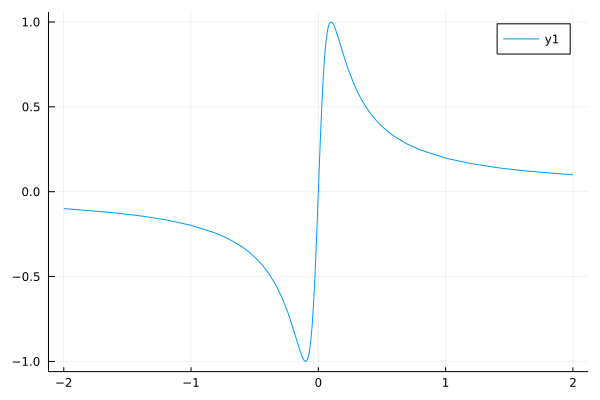

In [48]:
plot(test_functions[index][1],
    test_functions[index][2],
    test_functions[index][3]
)

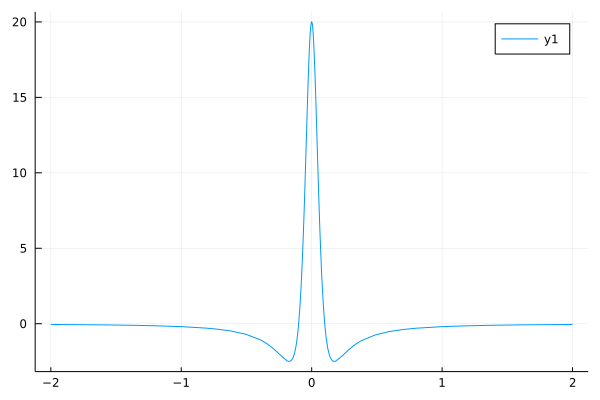

In [49]:
plot(D(test_functions[index][1]),
    test_functions[index][2],
    test_functions[index][3]
)

In [50]:
detected_roots = [
    find_zero(
        test_functions[index][1],
        (test_functions[index][2], test_functions[index][3]), 
        Bisection(),
        verbose=true),
    
    
    
    find_zero(
        (test_functions[index][1], D(test_functions[index][1])), 
        test_functions[index][2], 
        Roots.Newton(),
        verbose=true),
    
    
    
    find_zero(
        test_functions[index][1], 
        test_functions[index][2],   
        verbose=true) 
    ];

println("Checking correctness\n")

for i in 1:length(detected_roots)
    if detected_roots[i] != NaN
        root = detected_roots[i]
        println(algorithms[i])
        println("root is: ",root)
        println("f(x): ",test_functions[index][1](root))
        println("iszero: ",iszero(test_functions[index][1](root)))
        println("sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): ",
            sign(test_functions[index][1](prevfloat(root))) * 
            sign(test_functions[index][1](nextfloat(root))) )

        println("-------------------")
    end
end

Results of univariate zero finding:

* Converged to: 2.0
* Algorithm: Roots.BisectionExact()
* iterations: 0
* function evaluations: 3
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Exact zero found

Trace:
(a_0, b_0) = (-2.0000000000000000,  2.0000000000000000)

Results of univariate zero finding:

* Converged to: -1.6833214850237586e7
* Algorithm: Roots.Newton()
* iterations: 23
* function evaluations: 47
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -2.0000000000000000,	 fx_0 = -0.0997506234413965
x_1 = -4.0100250626566414,	 fx_1 = -0.0498440030658903
x_2 = -8.0250407288643615,	 fx_2 = -0.0249181226978897
x_3 = -16.0525740439580638,	 fx_3 = -0.0124585775678978
x_4 = -32.1063940423727985,	 fx_4 = -0.0062292283447634
x_5 = -64.2134110196661538,	 fx_5 = -0.0031146066185279
x_6 = -128.4271335015048408,	 fx_6 = -0.0015573023650649
x_7 = -256.8544227334350012,	 fx_7 = -0.0007786510645086
x_8 = -513.7089233320000403,	 fx_8 = -0.0003893

In [51]:
push!(df_test,
    ["f3", "bisection", 
        0, 3,
        0.0,
        0.0,
        true, -1.0
    ]
);

In [52]:
push!(df_test,
    ["f3", "newton", 
        23, 47,
        -1.6833214850237586e7,
        -1.1881271746328192e-8,
        false, 1.0
    ]
);

In [53]:
push!(df_test,
    ["f3", "secant", 
        35, 37,
        -1.8865593260698173e7,
        -1.0601309867983364e-8,
        false, 1.0
    ]
);

In [54]:
df_test;

## Function 4

In [55]:
index = 4

4

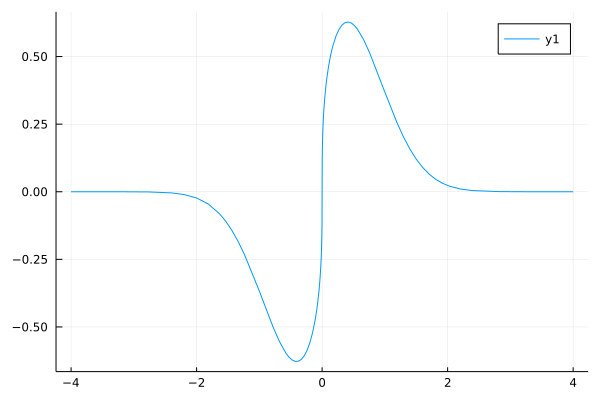

In [56]:
plot(test_functions[index][1],
    test_functions[index][2],
    test_functions[index][3]
)

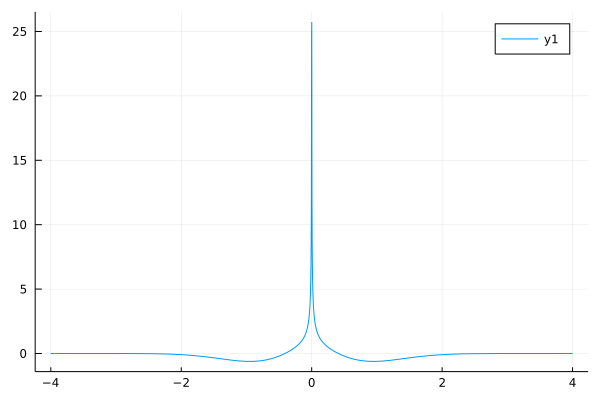

In [57]:
plot(D(test_functions[index][1]),
    test_functions[index][2],
    test_functions[index][3]
)

In [58]:
detected_roots = [
    find_zero(
        test_functions[index][1],
        (test_functions[index][2], test_functions[index][3]), 
        Bisection(),
        verbose=true),
    
    
    
    find_zero(
        (test_functions[index][1], D(test_functions[index][1])), 
        test_functions[index][2], 
        Roots.Newton(),
        verbose=true),
    
    
    
    find_zero(
        test_functions[index][1], 
        test_functions[index][2],   
        verbose=true) 
    ];

println("Checking correctness\n")

for i in 1:length(detected_roots)
    if detected_roots[i] != NaN
        root = detected_roots[i]
        println(algorithms[i])
        println("root is: ",root)
        println("f(x): ",test_functions[index][1](root))
        println("iszero: ",iszero(test_functions[index][1](root)))
        println("sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): ",
            sign(test_functions[index][1](prevfloat(root))) * 
            sign(test_functions[index][1](nextfloat(root))) )

        println("-------------------")
    end
end

Results of univariate zero finding:

* Converged to: 4.0
* Algorithm: Roots.BisectionExact()
* iterations: 0
* function evaluations: 3
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Exact zero found

Trace:
(a_0, b_0) = (-4.0000000000000000,  4.0000000000000000)

Results of univariate zero finding:

* Converged to: -5.858586374006785
* Algorithm: Roots.Newton()
* iterations: 18
* function evaluations: 37
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -4.0000000000000000,	 fx_0 = -0.0000001786384547
x_1 = -4.1263157894736846,	 fx_1 = -0.0000000646666422
x_2 = -4.2486871117345970,	 fx_2 = -0.0000000234325716
x_3 = -4.3674672123333007,	 fx_3 = -0.0000000084985062
x_4 = -4.4829591569720622,	 fx_4 = -0.0000000030846478
x_5 = -4.5954253271579439,	 fx_5 = -0.0000000011203999
x_6 = -4.7050947153566876,	 fx_6 = -0.0000000004072064
x_7 = -4.8121686141575815,	 fx_7 = -0.0000000001480826
x_8 = -4.9168251126004430,	 fx_8 = -0.0000000000538789
x_

In [59]:
push!(df_test,
    ["f4", "bisection", 
        0, 3,
        0.0,
        0.0,
        true, -1.0
    ]
);

In [60]:
push!(df_test,
    ["f4", "newton", 
        18, 37,
        -5.858586374006785,
        -2.2367968698607792e-15,
        false, 1.0
    ]
);

In [61]:
push!(df_test,
    ["f4", "secant", 
        26, 28,
        -5.787244483274693,
        -5.113051773712582e-15,
        false, 1.0
    ]
);

In [62]:
df_test;

## Function 5

In [63]:
index = 5

5

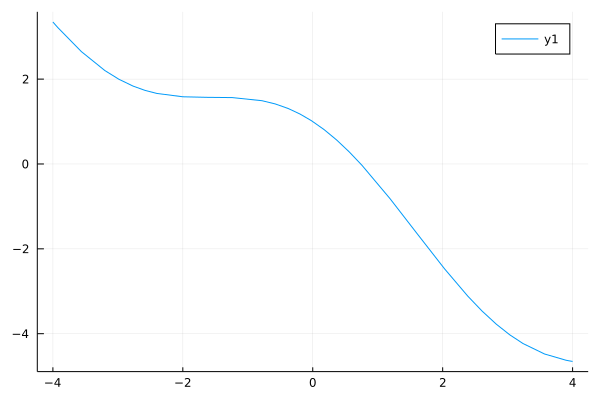

In [64]:
plot(test_functions[index][1],
    test_functions[index][2],
    test_functions[index][3]
)

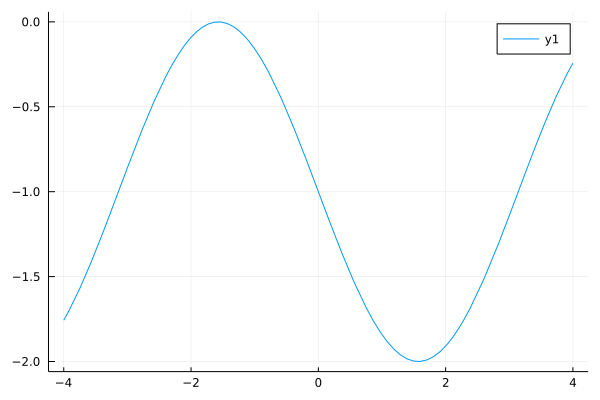

In [65]:
plot(D(test_functions[index][1]),
    test_functions[index][2],
    test_functions[index][3]
)

In [66]:
detected_roots = [
    find_zero(
        test_functions[index][1],
        (test_functions[index][2], test_functions[index][3]), 
        Bisection(),
        verbose=true),
    
    
    
    find_zero(
        (test_functions[index][1], D(test_functions[index][1])), 
        test_functions[index][2], 
        Roots.Newton(),
        verbose=true),
    
    
    
    find_zero(
        test_functions[index][1], 
        test_functions[index][2],   
        verbose=true) 
    ];

println("Checking correctness\n")

for i in 1:length(detected_roots)
    if detected_roots[i] != NaN
        root = detected_roots[i]
        println(algorithms[i])
        println("root is: ",root)
        println("f(x): ",test_functions[index][1](root))
        println("iszero: ",iszero(test_functions[index][1](root)))
        println("sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): ",
            sign(test_functions[index][1](prevfloat(root))) * 
            sign(test_functions[index][1](nextfloat(root))) )

        println("-------------------")
    end
end

Results of univariate zero finding:

* Converged to: 0.7390851332151611
* Algorithm: Roots.BisectionExact()
* iterations: 59
* function evaluations: 61
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  4.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  4.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  4.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  4.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  4.0000000000000000)
(a_5, b_5) = ( 0.0000000009167707,  4.0000000000000000)
(a_6, b_6) = ( 0.0000605583190918,  4.0000000000000000)
(a_7, b_7) = ( 0.0155639648437500,  4.0000000000000000)
(a_8, b_8) = ( 0.2495117187500000,  4.0000000000000000)
(a_9, b_9) = ( 0.2495117187500000,  0.9990234375000000)
(a_10, b_10) = ( 0.4992675781250000,  0.9990234375000000)
(a_11, b_11) = ( 0.4992675781250000,  0.7487792968750000)
(a_12, b_12) = ( 0.6236572265625000,  

In [67]:
push!(df_test,
    ["f5", "bisection", 
        59, 61,
        0.7390851332151607,
        0.0,
        true, -1.0
    ]
);

In [68]:
push!(df_test,
    ["f5", "newton", 
        9, 19,
        0.7390851332151607,
        0.0,
        true, -1.0
    ]
);

In [69]:
push!(df_test,
    ["f5", "secant", 
        7, 18,
        0.7390851332151607,
        0.0,
        true, -1.0
    ]
);

In [70]:
df_test;

## Function 6

In [71]:
index = 6

6

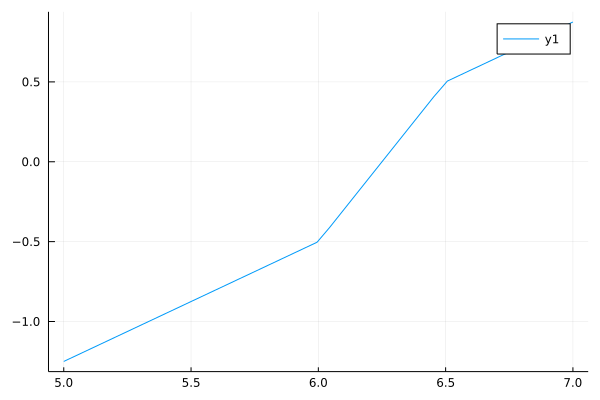

In [72]:
plot(test_functions[index][1],
    test_functions[index][2],
    test_functions[index][3]
)

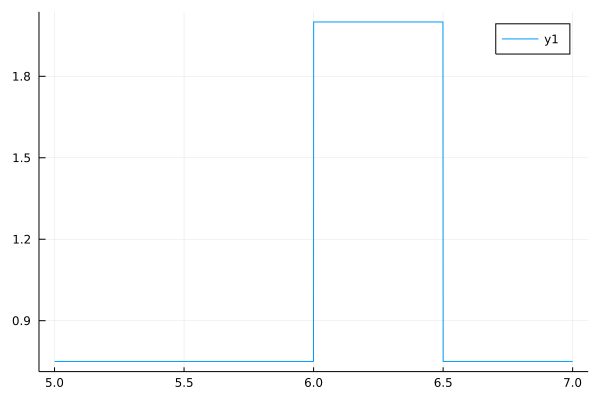

In [73]:
plot(D(test_functions[index][1]),
    test_functions[index][2],
    test_functions[index][3]
)

In [74]:
detected_roots = [
    find_zero(
        test_functions[index][1],
        (test_functions[index][2], test_functions[index][3]), 
        Bisection(),
        verbose=true),
    
    
    
#     find_zero(
#         (test_functions[index][1], D(test_functions[index][1])), 
#         test_functions[index][2], 
#         Roots.Newton(),
#         verbose=true),
    Inf,
    
    
    
    find_zero(
        test_functions[index][1], 
        test_functions[index][2],   
        verbose=true) 
    ];

println("Checking correctness\n")

for i in 1:length(detected_roots)
    if detected_roots[i] != NaN
        root = detected_roots[i]
        println(algorithms[i])
        println("root is: ",root)
        println("f(x): ",test_functions[index][1](root))
        println("iszero: ",iszero(test_functions[index][1](root)))
        println("sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): ",
            sign(test_functions[index][1](prevfloat(root))) * 
            sign(test_functions[index][1](nextfloat(root))) )

        println("-------------------")
    end
end

Results of univariate zero finding:

* Converged to: 6.5
* Algorithm: Roots.BisectionExact()
* iterations: 2
* function evaluations: 4
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 5.0000000000000000,  7.0000000000000000)
(a_1, b_1) = ( 6.0000000000000000,  7.0000000000000000)
(a_2, b_2) = ( 6.0000000000000000,  6.5000000000000000)

Results of univariate zero finding:

* Converged to: 6.267077205103288
* Algorithm: Roots.Secant(), with possible bracketing with Roots.AlefeldPotraShi()
* iterations: 2
* function evaluations: 9
* Note: Exact zero found. Bracketing used over (5.0, 6.666666666666667), those steps not shown. 

Trace:
x_0 =  5.0000000000000000,	 fx_0 = -1.2500000000000000

Checking correctness

Roots.BisectionExact()
root is: 6.25
f(x): 0.0
iszero: true
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -1.0
-------------------
Roots.Newton()
root is: Inf
f(x): Inf
iszer

In [75]:
push!(df_test,
    ["f6", "bisection", 
        2, 4,
        6.25,
        0.0,
        true, -1.0
    ]
);

In [76]:
push!(df_test,
    ["f6", "newton", 
        0, 0,
        Inf,
        Inf,
        false, Inf
    ]
);

In [77]:
push!(df_test,
    ["f6", "secant", 
        0, 3,
        6.25,
        0.0,
        true, -1.0
    ]
);

In [78]:
ENV["COLUMNS"] = 100

100

In [79]:
df_test

,fun,method,iterations,counting_function,root_x,root_y,correct_iszero,signdiff
,String,String,Int64,Int64,Float64,Float64,Bool,Float64
1,f1,bisection,0,3,0.0,0.0,1,-1.0
2,f1,newton,6,13,-1.89549,0.0,1,-1.0
3,f1,secant,2,11,-1.89549,-2.22045e-16,0,-0.0
4,f2,bisection,60,62,0.351734,0.0,1,-1.0
5,f2,newton,5,11,0.351734,0.0,1,-1.0
6,f2,secant,7,10,0.351734,0.0,1,-1.0
7,f3,bisection,0,3,0.0,0.0,1,-1.0
8,f3,newton,23,47,-1.68332e7,-1.18813e-8,0,1.0
9,f3,secant,35,37,-1.88656e7,-1.06013e-8,0,1.0


## 2.

```julia
function f6(x)
    if ( x < 6.0 )
    0.75 * ( x - 6.25 ) - 0.3125
    elseif ( x <= 6.50 )
    2.00 * ( x - 6.25 )
    else
    0.75 * ( x - 6.25 ) + 0.3125
    end
end
```

In [80]:
index = 6

6

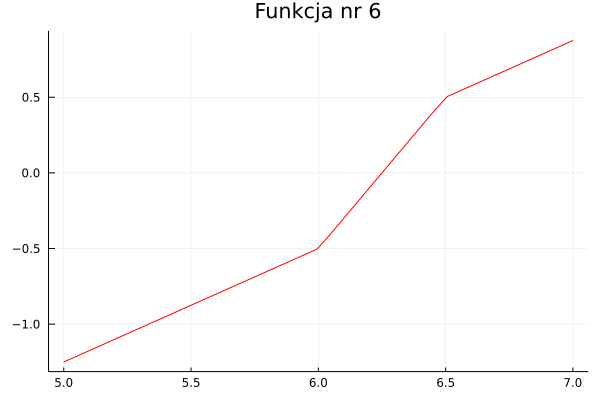

In [81]:
plot(test_functions[index][1],
    test_functions[index][2],
    test_functions[index][3],
    title = "Funkcja nr 6",
    label = "",
    color = :red
)

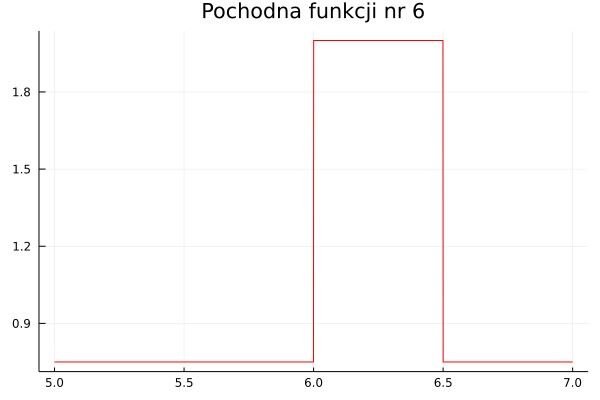

In [82]:
plot(D(test_functions[index][1]),
    test_functions[index][2],
    test_functions[index][3],
    title = "Pochodna funkcji nr 6",
    label = "",
    color = :red
)

### Metoda bisekcji:

In [83]:
p2_root1 = find_zero(
            test_functions[index][1],
            (test_functions[index][2], test_functions[index][3]), 
            Bisection(),
            verbose=true
        )

Results of univariate zero finding:

* Converged to: 6.5
* Algorithm: Roots.BisectionExact()
* iterations: 2
* function evaluations: 4
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 5.0000000000000000,  7.0000000000000000)
(a_1, b_1) = ( 6.0000000000000000,  7.0000000000000000)
(a_2, b_2) = ( 6.0000000000000000,  6.5000000000000000)



6.25

In [84]:
println("root is: ", p2_root1)
println("f(x): ", f6(p2_root1))
println("iszero: ",iszero(f6(p2_root1)))
println("sign(f(prevfloat(root))) * sign(f(nextfloat(root))) = ",
    sign(f6(prevfloat(p2_root1))) * 
    sign(f6(nextfloat(p2_root1))) 
)

root is: 6.25
f(x): 0.0
iszero: true
sign(f(prevfloat(root))) * sign(f(nextfloat(root))) = -1.0


### Metoda newtona:

In [85]:
p2_root2 = 
    find_zero(
        (test_functions[index][1], D(test_functions[index][1])), 
        test_functions[index][2], 
        Roots.Newton(),
        verbose=true)

Results of univariate zero finding:

* Convergence failed: Too many steps taken. 
* Algorithm Roots.Newton()

Trace:
x_0 =  5.0000000000000000,	 fx_0 = -1.2500000000000000
x_1 =  6.6666666666666670,	 fx_1 =  0.6250000000000002
x_2 =  5.8333333333333330,	 fx_2 = -0.6250000000000002
x_3 =  6.6666666666666670,	 fx_3 =  0.6250000000000002
x_4 =  5.8333333333333330,	 fx_4 = -0.6250000000000002
x_5 =  6.6666666666666670,	 fx_5 =  0.6250000000000002
x_6 =  5.8333333333333330,	 fx_6 = -0.6250000000000002
x_7 =  6.6666666666666670,	 fx_7 =  0.6250000000000002
x_8 =  5.8333333333333330,	 fx_8 = -0.6250000000000002
x_9 =  6.6666666666666670,	 fx_9 =  0.6250000000000002
x_10 =  5.8333333333333330,	 fx_10 = -0.6250000000000002
x_11 =  6.6666666666666670,	 fx_11 =  0.6250000000000002
x_12 =  5.8333333333333330,	 fx_12 = -0.6250000000000002
x_13 =  6.6666666666666670,	 fx_13 =  0.6250000000000002
x_14 =  5.8333333333333330,	 fx_14 = -0.6250000000000002
x_15 =  6.6666666666666670,	 fx_15 =  0.62500000

LoadError: Roots.ConvergenceFailed("Stopped at: xn = 6.666666666666667. Too many steps taken. ")

### Metoda siecznych:

In [86]:
p2_root3 = find_zero(
            test_functions[index][1], 
            test_functions[index][2],   
            verbose=true
        ) 

Results of univariate zero finding:

* Converged to: 6.267077205103288
* Algorithm: Roots.Secant(), with possible bracketing with Roots.AlefeldPotraShi()
* iterations: 2
* function evaluations: 9
* Note: Exact zero found. Bracketing used over (5.0, 6.666666666666667), those steps not shown. 

Trace:
x_0 =  5.0000000000000000,	 fx_0 = -1.2500000000000000



6.25

In [87]:
println("root is: ", p2_root3)
println("f(x): ", f6(p2_root3))
println("iszero: ",iszero(f6(p2_root3)))
println("sign(f(prevfloat(root))) * sign(f(nextfloat(root))) = ",
    sign(f6(prevfloat(p2_root3))) * 
    sign(f6(nextfloat(p2_root3))) 
)

root is: 6.25
f(x): 0.0
iszero: true
sign(f(prevfloat(root))) * sign(f(nextfloat(root))) = -1.0


### Wnioski:
#### - poprawne wyniki dla metod bisekcji i siecznych
#### - brak wyniku dla metody Newtona z powodu zapetlenia sie algorytmu - rozbiezny cykl iteracji

## 3.  Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)

## Metoda bisekcji

In [88]:
f_bis_range = -2*pi - 1:0.01:2*pi + 1
f_bis_error(x) = cos(x);

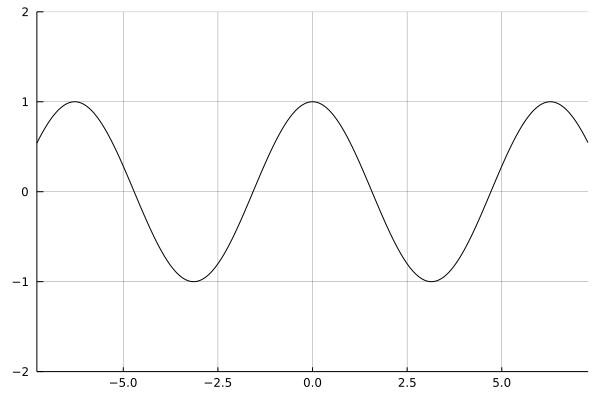

In [89]:
plot(f_bis_range,f_bis_error, 
    xlims=(-2*pi - 1, 2*pi + 1), ylims=(-2, 2), 
    color = "black", label = "",
    grid = true, gridalpha = 0.4
)

In [90]:
find_zero(
    f_bis_error,
    (-pi, pi), 
    Bisection(),
    verbose=true
)

LoadError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



Metoda nie dziala z tego powodu, ze wartosci funkcji na dwoch krancach przedzialu oraz w jego srodku sa tego samego znaku

In [91]:
find_zero(
    f_bis_error,
    (-pi, 0), 
    Bisection(),
    verbose=true
)

Results of univariate zero finding:

* Converged to: -1.5707963267948966
* Algorithm: Roots.BisectionExact()
* iterations: 62
* function evaluations: 64
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Change of sign at xn identified. 

Trace:
(a_0, b_0) = (-3.1415926535897931,  0.0000000000000000)
(a_1, b_1) = (-3.1415926535897931, -0.0000000000000000)
(a_2, b_2) = (-3.1415926535897931, -0.0000000000000000)
(a_3, b_3) = (-3.1415926535897931, -0.0000000000000000)
(a_4, b_4) = (-3.1415926535897931, -0.0000000000000000)
(a_5, b_5) = (-3.1415926535897931, -0.0000000007231529)
(a_6, b_6) = (-3.1415926535897931, -0.0000476647227230)
(a_7, b_7) = (-3.1415926535897931, -0.0122370076600923)
(a_8, b_8) = (-3.1415926535897931, -0.1960708317054192)
(a_9, b_9) = (-3.1415926535897931, -0.7848407451095626)
(a_10, b_10) = (-3.1415926535897931, -1.5702389085070108)
(a_11, b_11) = (-2.1410352353019073, -1.5702389085070108)
(a_12, b_12) = (-1.8203782630789822, -1.5702389085070108)
(a_13, 

-1.5707963267948966

## Metoda Newtona

In [92]:
f_newton_range = -3:0.01:4
f_newton_error(x) = x^3 - 2*x + 2;

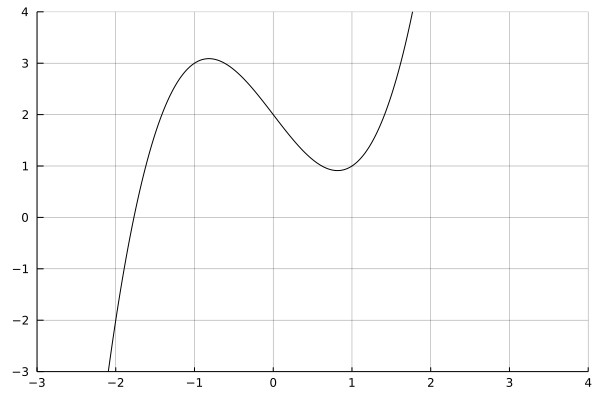

In [93]:
plot(f_newton_range,f_newton_error, 
    xlims=(-3, 4), ylims=(-3, 4), 
    color = "black", label = "",
    grid = true, gridalpha = 0.4
)

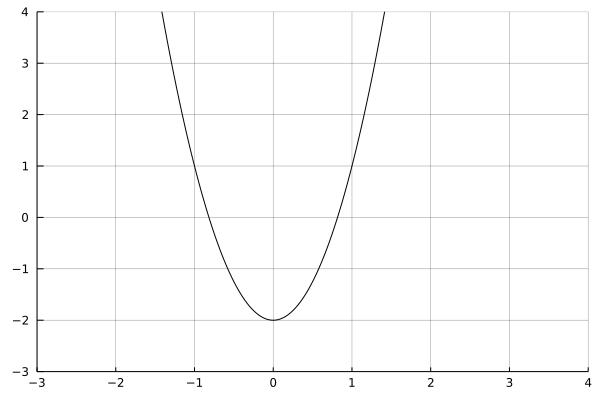

In [94]:
plot(f_newton_range,D(f_newton_error), 
    xlims=(-3, 4), ylims=(-3, 4), 
    color = "black", label = "",
    grid = true, gridalpha = 0.4
)

In [95]:
f_newton_x0 = 1
a = D(f_newton_error)(f_newton_x0)
b = f_newton_error(f_newton_x0) - D(f_newton_error)(f_newton_x0) * f_newton_x0
f_newton_x1 = -b / a

-0.0

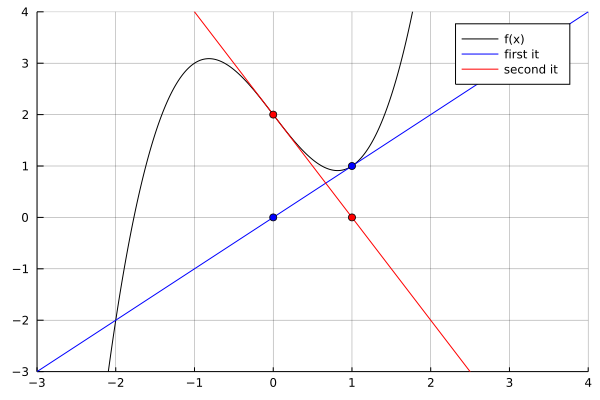

In [96]:
plot(f_newton_range,f_newton_error, 
    xlims=(-3, 4), ylims=(-3, 4), 
    color = "black", label = "f(x)",
    grid = true, gridalpha = 0.4
)
plot!(f_newton_range,
    x -> D(f_newton_error)(f_newton_x0)*x + 
    f_newton_error(f_newton_x0) - D(f_newton_error)(f_newton_x0) * f_newton_x0 , 
    xlims=(-3, 4), ylims=(-3, 4), 
    color = "blue", label = "first it"
)
plot!(f_newton_range,
    x -> D(f_newton_error)(f_newton_x1)*x + 
    f_newton_error(f_newton_x1) - D(f_newton_error)(f_newton_x1) * f_newton_x1 , 
    xlims=(-3, 4), ylims=(-3, 4), 
    color = "red", label = "second it"
)
scatter!([(f_newton_x0,0),
        (f_newton_x1,f_newton_error(f_newton_x1))], 
    color = "red", label = "")
scatter!([(f_newton_x0,f_newton_error(f_newton_x0)),
        (f_newton_x1,0)], 
    color = "blue", label = "")

In [97]:
find_zero((f_newton_error, 
        D(f_newton_error)),
        f_newton_x0, Roots.Newton(),verbose=true
)

Results of univariate zero finding:

* Convergence failed: Too many steps taken. 
* Algorithm Roots.Newton()

Trace:
x_0 =  1.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.0000000000000000,	 fx_1 =  2.0000000000000000
x_2 =  1.0000000000000000,	 fx_2 =  1.0000000000000000
x_3 =  0.0000000000000000,	 fx_3 =  2.0000000000000000
x_4 =  1.0000000000000000,	 fx_4 =  1.0000000000000000
x_5 =  0.0000000000000000,	 fx_5 =  2.0000000000000000
x_6 =  1.0000000000000000,	 fx_6 =  1.0000000000000000
x_7 =  0.0000000000000000,	 fx_7 =  2.0000000000000000
x_8 =  1.0000000000000000,	 fx_8 =  1.0000000000000000
x_9 =  0.0000000000000000,	 fx_9 =  2.0000000000000000
x_10 =  1.0000000000000000,	 fx_10 =  1.0000000000000000
x_11 =  0.0000000000000000,	 fx_11 =  2.0000000000000000
x_12 =  1.0000000000000000,	 fx_12 =  1.0000000000000000
x_13 =  0.0000000000000000,	 fx_13 =  2.0000000000000000
x_14 =  1.0000000000000000,	 fx_14 =  1.0000000000000000
x_15 =  0.0000000000000000,	 fx_15 =  2.00000000

LoadError: Roots.ConvergenceFailed("Stopped at: xn = 0.0. Too many steps taken. ")

## Metoda siecznych

In [98]:
f_secant_range = -25:0.1:25
f_secant_error(x) = (x^2 + 2x + 2)/(x^2 - 2x + 2);

In [99]:
f_secant_x0 = -2

-2

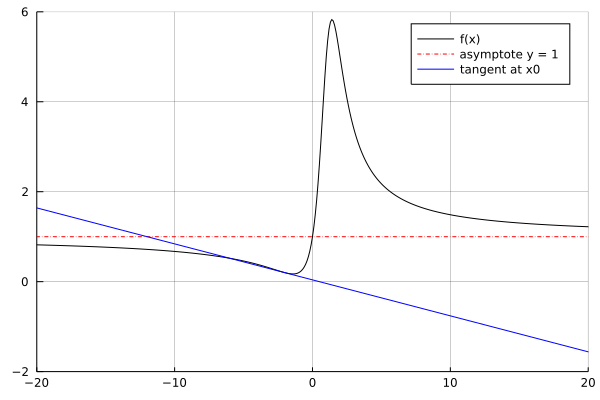

In [100]:
plot(f_secant_range,f_secant_error, 
    xlims=(-20, 20), ylims=(-2, 6), 
    color = "black", label = "f(x)",
    grid = true, gridalpha = 0.4
)
plot!(f_secant_range,
    x -> 1,
    line =:dashdot,
    color = "red", label = "asymptote y = 1"
)
plot!(f_secant_range,
    x -> D(f_secant_error)(f_secant_x0)*x + 
    f_secant_error(f_secant_x0) - D(f_secant_error)(f_secant_x0) * f_secant_x0,
#     xlims=(-3, 4), ylims=(-3, 4), 
    color = "blue", label = "tangent at x0"
)

In [101]:
find_zero(
    f_secant_error, 
    f_secant_x0,   
    verbose=true
    ) 

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Roots.Secant()

Trace:
x_0 = -2.0000000000000000,	 fx_0 =  0.2000000000000000
x_1 = -1.9993944472210572,	 fx_1 =  0.1999515675179395
x_2 = -1.9388391693267764,	 fx_2 =  0.1952332451872641
x_3 = -1.8830022297196667,	 fx_3 =  0.1911243470960670
x_4 = -1.8412928307256533,	 fx_4 =  0.1882270460643536
x_5 = -1.8034900476901377,	 fx_5 =  0.1857425105296205
x_6 = -1.7701205398539410,	 fx_6 =  0.1836713197685118
x_7 = -1.7376604672358098,	 fx_7 =  0.1817754063371429



LoadError: Roots.ConvergenceFailed("Stopped at: xn = 1.3745295685896408. ")